In [5]:
from skimage.data import imread
from scipy.misc import imresize
import scipy.ndimage
import numpy as np
import skimage

import ba.plt
import matplotlib.pyplot as plt

im = imread('../data/results/person_hair_FCN_50samples/train_iter_500/heatmaps_overlays/2010_003944.png')
hm = imread('../data/results/person_hair_FCN_50samples/train_iter_500/heatmaps/2010_003944.png')

# Scale heatmap to image size
hm = imresize(hm, im.shape[:-1])
hm = skimage.img_as_float(hm)
fig = ba.plt.plt_hm(hm)
plt.show()
ba.plt.savefig('distance_transform_hm')

/net/hciserver03/storage/mfrank/src/ba/.venv/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


RuntimeError: LaTeX was not able to process the following string:
b'lp'
Here is the full report generated by LaTeX: 



RuntimeError: Latex command not found. Install 'pdflatex' or change pgf.texsystem to the desired command.

In [13]:
import seaborn as sns

In [15]:
sns.choose_cubehelix_palette(as_cmap=True)

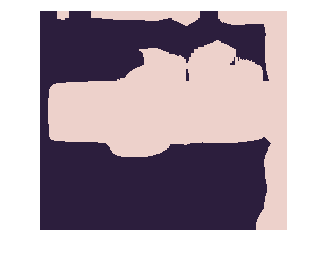

In [8]:
# Threshould heatmap to get the near zero values
hmnull = hm < 0.1
ba.plt.plt_hm(hmnull)
plt.show()

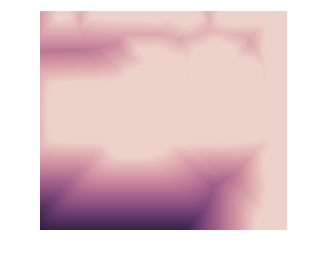

In [9]:
# Compute the negative distance transform inside the near zero values
hmedt = scipy.ndimage.distance_transform_cdt(hmnull).astype(float)
hmedt /= np.sum(hmedt)
ba.plt.plt_hm(hmedt)
plt.show()